In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5 * X + 2 + np.random.randn(100, 1)

Text(0, 0.5, 'y dataset')

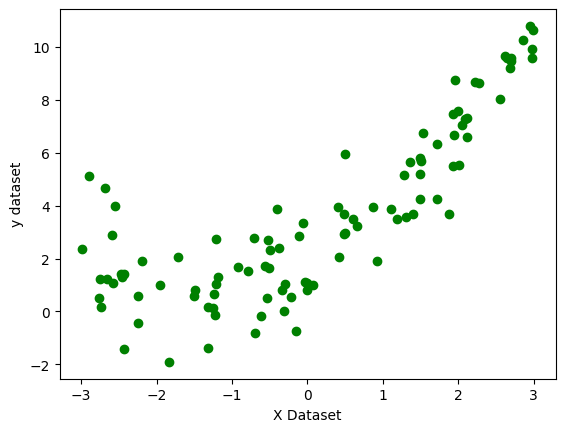

In [52]:
plt.scatter(X,y,color='g')
plt.xlabel('X Dataset')
plt.ylabel('y dataset')

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression()

In [55]:
reg1.fit(X_train,y_train)

LinearRegression()

In [56]:
from sklearn.metrics import r2_score
score = r2_score(y_test,reg1.predict(X_test))
print(score)

0.5927627712568226


Text(0, 0.5, 'y dataset')

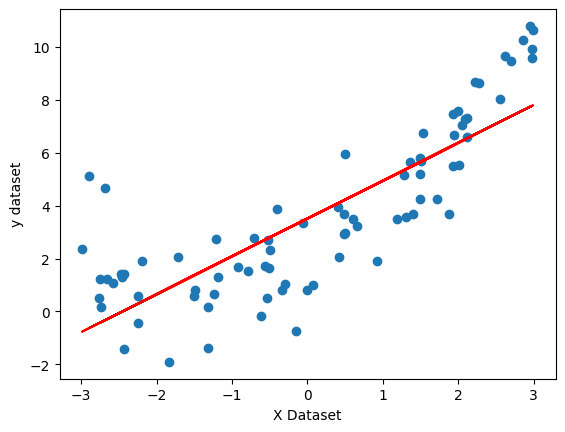

In [57]:
## visualisation of the model
plt.plot(X_train,reg1.predict(X_train),color='r')
plt.scatter(X_train,y_train)
plt.xlabel('X Dataset')
plt.ylabel('y dataset')

In [58]:
## now we will apply polynomial  transformation
from sklearn.preprocessing import PolynomialFeatures

In [61]:
poly = PolynomialFeatures(degree=2, include_bias=True)

In [62]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [63]:
X_train_poly

array([[ 1.00000000e+00, -2.45732504e+00,  6.03844636e+00],
       [ 1.00000000e+00,  1.35764795e+00,  1.84320795e+00],
       [ 1.00000000e+00,  2.85841375e+00,  8.17052917e+00],
       [ 1.00000000e+00,  2.05075929e+00,  4.20561368e+00],
       [ 1.00000000e+00,  2.11548516e+00,  4.47527746e+00],
       [ 1.00000000e+00, -4.95243070e-01,  2.45265699e-01],
       [ 1.00000000e+00, -2.68679506e+00,  7.21886770e+00],
       [ 1.00000000e+00,  2.97758951e+00,  8.86603929e+00],
       [ 1.00000000e+00, -1.56998665e-01,  2.46485809e-02],
       [ 1.00000000e+00, -2.43823159e+00,  5.94497331e+00],
       [ 1.00000000e+00, -2.75997786e+00,  7.61747781e+00],
       [ 1.00000000e+00,  2.99360812e+00,  8.96168957e+00],
       [ 1.00000000e+00, -2.89102665e+00,  8.35803511e+00],
       [ 1.00000000e+00, -2.19176671e+00,  4.80384131e+00],
       [ 1.00000000e+00, -7.13595327e-01,  5.09218290e-01],
       [ 1.00000000e+00,  1.31314758e+00,  1.72435657e+00],
       [ 1.00000000e+00, -5.31404038e-01

In [64]:
reg2 = LinearRegression()

In [65]:
reg2.fit(X_train_poly,y_train)
y_pred = reg2.predict(X_test_poly)
score = r2_score(y_test,y_pred)
print(score)

0.881492557982111


In [66]:
print(reg2.coef_)

[[0.         1.43334798 0.46818443]]


In [67]:
print(reg2.intercept_)

[1.9729718]


Text(0, 0.5, 'y dataset')

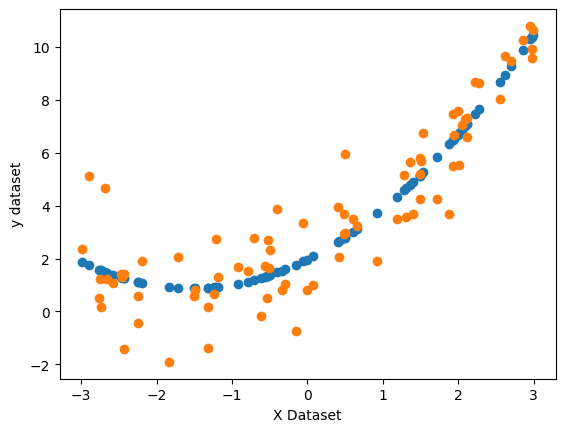

In [70]:
## visualisation of the model
# plt.plot(X_train,reg2.predict(X_train_poly),color='r')
plt.scatter(X_train,reg2.predict(X_train_poly))
plt.scatter(X_train,y_train)
plt.xlabel('X Dataset')
plt.ylabel('y dataset')

In [73]:
poly = PolynomialFeatures(degree=3, include_bias=True)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [74]:
X_train_poly

array([[ 1.00000000e+00, -2.45732504e+00,  6.03844636e+00,
        -1.48384254e+01],
       [ 1.00000000e+00,  1.35764795e+00,  1.84320795e+00,
         2.50242749e+00],
       [ 1.00000000e+00,  2.85841375e+00,  8.17052917e+00,
         2.33547529e+01],
       [ 1.00000000e+00,  2.05075929e+00,  4.20561368e+00,
         8.62470135e+00],
       [ 1.00000000e+00,  2.11548516e+00,  4.47527746e+00,
         9.46738305e+00],
       [ 1.00000000e+00, -4.95243070e-01,  2.45265699e-01,
        -1.21466138e-01],
       [ 1.00000000e+00, -2.68679506e+00,  7.21886770e+00,
        -1.93956181e+01],
       [ 1.00000000e+00,  2.97758951e+00,  8.86603929e+00,
         2.63994256e+01],
       [ 1.00000000e+00, -1.56998665e-01,  2.46485809e-02,
        -3.86979431e-03],
       [ 1.00000000e+00, -2.43823159e+00,  5.94497331e+00,
        -1.44952218e+01],
       [ 1.00000000e+00, -2.75997786e+00,  7.61747781e+00,
        -2.10240701e+01],
       [ 1.00000000e+00,  2.99360812e+00,  8.96168957e+00,
      

In [76]:
from sklearn.metrics import r2_score
reg2.fit(X_train_poly,y_train)
y_pred = reg2.predict(X_test_poly)
score=r2_score(y_test,y_pred)
print(score)

0.8858378954619978


In [77]:
## 3 Prediction of new data
X_new = np.linspace(-3,3,200).reshape(200,1)
X_new_poly = poly.transform(X_new)

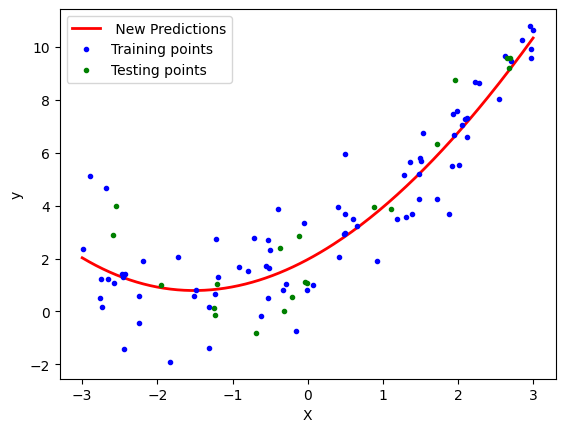

In [79]:
y_new = reg2.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [80]:
from sklearn.pipeline import Pipeline

In [81]:
def poly_regression(degree):
    X_new = np.linspace(-3,3,200).reshape(200,1)
    poly_features = PolynomialFeatures(degree=degree,include_bias=True)
    linreg = LinearRegression()
    polyreg = Pipeline([
        ("poly_features",poly_features),
        ("linreg",linreg)
    ])
    polyreg.fit(X_train,y_train)
    y_pred_new = polyreg.predict(X_new)
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()
    

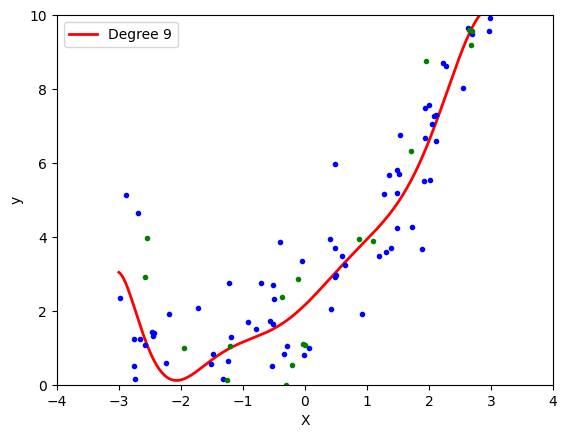

In [89]:
poly_regression(9)